# Autocompletado de palabras y oraciones
## Resumen

Se presenta una breve introducción al proyecto denominado “Autocompletado de palabras y oraciones”, el cual tiene como objetivo principal realizar un modelo de predicción y corrección de escritura en tiempo real, resolviendo de manera particular los problemas que se pueden suscitar durante la redacción electrónica de textos debidas a falta de conocimiento de ortografía o para hacerlo más rápido. Se presenta el desarrollo completo del proyecto, desde la adquisición de datos para el entrenamiento del modelo, su análisis, la implementación de los algoritmos utilizados y finalmente una aplicación que concentra todo el trabajo.

## 1. Objetivo de investigación

En esta sección se presenta el problema a solucionar, la justificación y el alcance del proyecto que se desarrollará durante este semestre. El propósito del proyecto es crear una aplicación capaz de realizar correcciones ortográficas, así como predicciones palabras y oraciones completas en tiempo real sin la utilización de un modelo de aprendizaje automático sino con la utilización de estructuras de datos que permitan un acceso rápido a los datos. Las predicciones se realizarán con base en un diccionario para las correcciones ortográficas y textos para las oraciones que serán procesados con antelación.

### 1.1 Introducción

El presente documento describe la ejecución del ciclo de vida del proyecto “Autocompletado de palabras y oraciones”, el cual consiste en una aplicación capaz de cumplir con sus funciones en tiempo real, las cuales son corregir palabras con errores ortográficos, así como predecir (autocompletar) palabras y oraciones completas.

### 1.2 Antecedentes

Actualmente existen diferentes proyectos capaces de lograr el resultado descrito previamente. Probablemente, el proyecto más impresionante y potencialmente útil es GPT-3 \[1\], desarrollado por OpenAI, el cuál es capaz de interpretar instrucciones que nunca se le han enseñado antes, entre ellas escribir texto de un tema en particular. 

Por otro lado, una de las aplicaciones más utilizadas en la actualidad son los teclados de teléfono celular predictivos, los cuales realizan correcciones en automático cuando una palabra está mal escrita, así como sugieren las tres palabras con mayor probabilidad de ser escritas a partir del texto escrito. 

Asimismo, el buscador Google ofrece siempre sugerencias en su barra de búsqueda, las cuales pueden ir desde simplemente sugerir alguna de las palabras u oraciones previamente buscadas hasta sugerir una oración completa.

Finalmente, los correos electrónicos recibidos en Gmail.com, pueden ser respondidos con sugerencias de oraciones que son propuestas a partir del cuerpo del correo electrónico recibido.

### 1.3 Justificación

La Inteligencia Artificial (IA) evoluciona a pasos agigantados, uno de los campos de estudio más importantes en la actualidad es el Procesamiento de Lenguaje Natural (NLP), el cual hace posible la interpretación y generación de texto humanamente leíble, de modo que pueda ser procesado computacionalmente. Este proyecto permite poner en práctica este campo de estudio ofreciendo una aplicación que puede posteriormente expandirse de modo que sea capaz de generar texto de manera autónoma partiendo de la predicción de palabras y oraciones.

Además, se espera tener texto sin errores de ortografía e incrementar la velocidad de escritura gracias a las sugerencias ofrecidas por la herramienta.

### 1.4 Problema

A diferencia de cuando escribimos texto de manera tradicional con un lápiz o una pluma, cuando lo hacemos de manera digital, es decir, a través de un teclado físico o táctil, somos más propensos a escribir textos con errores provocados por presionar inintencionalmente las teclas equivocadas o simplemente por presionar más de una al mismo tiempo, además es posible escribir con errores debidos a una mala ortografía del autor y puede resultar lento.

### 1.5 Objetivos
#### 1.5.1 Objetivo General

El objetivo de este proyecto es crear una aplicación capaz de corregir errores ortográficos y predecir el texto que será introducido para completar una oración en tiempo real. Conforme el usuario capture cada letra de la frase a buscar, se le deberán sugerir las frases más frecuentemente utilizadas que comiencen con las letras escritas, o con alguna letra diferente si se considera que el usuario ha escrito mal alguna palabra. La cantidad de palabras y frases debe ser mayor a 20,000. Se consideran casos en los que un usuario intercambia letras hoal => hola, error de ortografía, ola => hola, baca => vaca. Finalmente, se realiza un registro de las palabras empleadas, por lo que si se vuelve a escribir una oración primero sugiere aquella que ya fue usada.

### 1.6 Novedad científica, tecnológica o aportación

En mi opinión, la solución natural para el problema de esta naturaleza sería uno basado en machine learning o deep learning, lo que computacionalmente hablando puede resultar muy costoso. El objetivo de este proyecto es utilizar un paradigma diferente en el que por medio de estructuras de datos se pueda resolver el problema. Esto puede ser retador pues el tiempo de búsqueda debe ser rápido a pesar de tener decenas o cientos de miles de palabras y de oraciones almacenadas entre las que se deberá realizar la búsqueda para la predicción, así como almacenar nuevas oraciones, todo en tiempo real.


## 2. Obtención de los datos

En esta sección se presenta el enfoque y el procedimiento para obtener los datos que se utilizarán para el entrenamiento del modelo. Esta sección se divide en la obtención de palabras y en la obtención de oraciones e incluye el código que permite almacenarlos en variables listas para ser exploradas.

### 2.1 Proceso de obtención de los datos
#### 2.1.1 Obtención de las palabras

Para la realización de este proyecto se deberán emplear al menos un par de datasets, uno con la mayor cantidad posible de palabras del idioma español enfocado principalmente para la corrección de palabras escritas equívocamente y otro con texto que será utilizado para la predicción de oraciones.

Para el diccionario de palabras, he decidido utilizar una de las listas publicadas por la Real Academia Española (RAE) \[2\] en el sitio http://corpus.rae.es/lfrecuencias.html. Existen 4 variantes, la [lista completa](http://corpus.rae.es/frec/CREA_total.zip), una lista que contiene únicamente las [1,000](http://corpus.rae.es/frec/1000_formas.TXT) formas más frecuentes, otra con [5,000](http://corpus.rae.es/frec/5000_formas.TXT) y finalmente una que contiene [10,000](http://corpus.rae.es/frec/10000_formas.TXT).

He decidido utilizar la lista completa, la cuál ya está ordenada de la palabra más frecuente a la menos. Por lo que si la eficiencia del modelo lo requiere puedo disminuir la cantidad de palabras potencialmente corregibles afectando lo menos posible su eficacia. Para la descarga del archivo utilizaremos la librería [Requests](https://requests.readthedocs.io/) \[3\] y para su lectura la librería [Pandas](https://pandas.pydata.org/) \[4\]. Como se muestra a continuación, el resultado es un dataframe con las palabras.

In [1]:
import requests
import pandas as pd
from os import path

# Download file with words from RAE
# http://corpus.rae.es/lfrecuencias.html
baseUrl = 'http://corpus.rae.es/frec/'
zipName = 'CREA_total.zip'
fullUrl = baseUrl + zipName

if not path.exists(zipName):
    result = requests.get(fullUrl, stream=True)
    with open(zipName, 'wb') as fd:
        for chunk in result.iter_content(chunk_size=128):
            fd.write(chunk)

# Read file with words from RAE, add new column names
words_df = pd.read_csv(zipName, delimiter='\t', encoding='latin-1', names=['Index', 'Word', 'Frequency', 'NormFrequency'])

words_df

,Index,Word,Frequency,NormFrequency
0,Orden,Frec.absoluta,Frec.normalizada,NaN
1,1.,de,"9,999,518",65545.55
2,2.,la,"6,277,560",41148.59
3,3.,que,"4,681,839",30688.85
4,4.,el,"4,569,652",29953.48
...,...,...,...,...
737795,737795,zzzzzzzzzz,1,0.00
737796,737796,zzzzzzzzzzzantes,1,0.00
737797,737797,zzzzzzzzzzzzz,1,0.00
737798,737798,zzzzzzzzzzzzzzzzz,1,0.00


### 2.1.2 Obtención de las oraciones

Para la adquisición de las oraciones, se han explorado diferentes posibilidades, entre las que destacan la adquisición de textos del [Proyecto Gutenberg](https://www.gutenberg.org/browse/languages/es) \[5\], adquisición de textos informativos del diario local El Informador, el cual ofrece una hemeroteca en su página web http://hemeroteca.informador.com.mx/ en donde es posible obtener en formato PDF cada una de las páginas publicadas en el diario desde su fundación en el año 1917, así como una edición online de la que se puede extraer texto pues ofrecen algunas herramientas para la lectura digital de las noticias, se accede a través del sitio http://elinformador.pressreader.com/. La opción del diario local tiene la ventaja de contener oraciones en un idioma español sin conjugaciones y regionalismos de otras ciudades y países. 

Sin embargo, la opción elegida es la tercera, la cual consiste en realizar web scrapping de [Wikipedia en español](https://es.wikipedia.org/wiki/Wikipedia_en_espa%C3%B1ol), la cual contiene 7’188,389 de entradas al día 6 de octubre de 2020 \[6\]. Además tiene la posibilidad de retornar una página aleatoria accediendo desde el link estático https://es.wikipedia.org/wiki/Especial:Aleatoria, lo que lo vuelve una herramienta de suma utilidad pues permite adquirir tantos textos se puedan procesar con un esfuerzo pequeño. Para la adquisición de los datos se utiliza la librería [Requests](https://requests.readthedocs.io/) para la adquisición del contenido en formato HTML y la librería [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) \[7\], la cual permite acceder a secciones específicas partiendo de los tags del contenido en HTML.

A continuación se muestra el código que lee $n$ páginas aleatorias de Wikipedia en Español, separa el texto en oraciones con ayuda del método "sent_tokenize" te la librería [NLTK (Natural Language-Processing ToolKit)](https://www.nltk.org/) \[8\], y cada una de estas las almacena en un dataframe de la librería Pandas. Una vez creado el dataframe, este se almacena en un archivo con formato csv (Comma Separated Values), de modo que la próxima vez que se ejecute esta sección no sea necesario volver a descargar las páginas de wikipedia sino que sólo se tenga que leer el dataframe desde el archivo.

El resultado de ejecutar este script es el texto plano del contenido de, en este caso, $n = 10,000$ páginas de Wikipedia en Español concatenadas, lo que será útil para el entrenamiento del modelo de predicción de oraciones.

In [2]:
from bs4 import BeautifulSoup
import nltk

sentencesFile = 'sentences.csv'

# Sentences are saved in a file so it's not necessary to download every time
# Uncomment line "if False:" to force to download sentences again
#if False:
if path.exists(sentencesFile):
    sentences_df = pd.read_csv(sentencesFile)
else:
    # Create list of pages
    # Title -> Wikipedia page title
    # sentence -> The actual sentence
    sentences_df = pd.DataFrame(columns = ['Title', 'Sentence'])

    # Load n web pages content
    n = 10000
    for i in range(n):
        result = requests.get('https://es.wikipedia.org/wiki/Especial:Aleatoria').content

        # Convert to a beautiful soup object
        soup = BeautifulSoup(result, 'html.parser')

        # Exclude tables
        for table in soup.find_all('table'):
            table.extract()

        # Search for title
        title = soup.find('h1').get_text()
        
        # Search for all p tags and store them in the paragraph string
        p = soup.find_all('p')

        paragraph = ''
        for each_p in p:
            paragraph += str(each_p.get_text())

        # Remove zero-lenght characters which can't be saved in the csv file
        paragraph = paragraph.replace('\u200b', ' ')

        # Tokenize sentences and append them in the dataframe
        sentences = nltk.sent_tokenize(paragraph)

        for sentence in sentences:
            sentences_df = sentences_df.append({'Title':title, 'Sentence':sentence}, ignore_index=True)

    # Write dataframe into a csv file
    sentences_df.to_csv(sentencesFile, index=False)
        
# Print dataframe
sentences_df

,Title,Sentence
0,Ouad Naga,Ouad Naga es una comuna o municipio del depart...
1,Ouad Naga,En marzo de 2013 presentaba una población cens...
2,Ouad Naga,[1] \nSe encuentra ubicada al suroeste del paí...
3,Asociación de Escritores Proletario-Revolucion...,La Asociación de Escritores Proletario-Revoluc...
4,Asociación de Escritores Proletario-Revolucion...,[2] \nLos miembros formaban parte de dos grupo...
...,...,...
162424,Aubrey Black,[1] \nAlgunos de sus trabajos son After School...
162425,Aubrey Black,[18]
162426,Citólisis,La citolisis o citólisis es el proceso por el ...
162427,Citólisis,"Las causas son numerosas y variables, pueden s..."


### 2.2 Conclusiones
Python ofrece multitud de librerías para realizar adquisición de datos existentes en sitios web de una manera rápida y sencilla. Las funcionalidades explotadas durante esta sección para obtener datos útiles han sido mínimas pero suficientes, por lo que se comprueba que el potencial de estas herramientas es sumamente alto. Escalar este procedimiento a sitios web más complejos requeriría únicamente esfuerzo en la localización del texto considerado útil dentro de los tags de HTML, es decir, sería un esfuerzo bajo. Esta escalabilidad permitiría adquirir datos en contextos más formales, más informales, en contextos específicos (por ejemplo, si quisiéramos hacer predicciones especializadas en un contexto técnico) o incluso en otros idiomas, permitiendo así cambiar completamente la naturaleza de las predicciones.


## 3. Preparación de los datos

En esta sección se presenta la preparación de las palabras y las oraciones obtenidas en la sección anterior, con el objetivo de tener datos que sea más sencillo procesar directamente en los modelos. Para ello, en esta sección se toma como base la visualización de los datos que se obtuvo en la sección anterior para lograr identificar los problemas de los datos obtenidos.

### 3.1 Proceso de preparación de los datos

El procesamiento de datos es una etapa importante pues es cuando se realiza la transformación de datos no estructurados a estructurados, donde se identifica qué datos parecen ser relevantes y para los que no lo son se realiza limpieza después de haberlos obtenido en crudo.

#### 3.1.1 Preparación de las palabras

Para la preparación de las palabras se utiliza el potencial ofrecido por la librería pandas, con la que se eliminan las entradas que no contienen datos, se eliminan las columnas y filas que no serán utilizadas, se transforma la columna de frecuencias a un valor entero dado que originalmente estos son una cadena de texto con comas y apóstrofes para separar las cifras de miles y millones. El resultado final es un dataframe que contiene la serie "Word" con un tipo de dato "string" y una serie "Frequency" con un tipo de dato "int".

In [3]:
# Remove row with original titles
words_df.drop(index=0, inplace=True)

# Remove cells without useful values
words_df.dropna(inplace=True)

# Reset data frame indexes
words_df.reset_index(inplace=True)

# Drop columns that are not going to be used
words_df.drop(labels=['index', 'Index', 'NormFrequency'], axis=1, inplace=True)

# Convert word column to string and frequency to integer
words_df['Word'] = words_df['Word'].apply(lambda x: str(x).lower().strip()).astype('str').convert_dtypes(str)
words_df['Frequency'] = words_df['Frequency'].apply(lambda x: str(x).strip().replace(',','')).astype('int')

words_df.dtypes
words_df

,Word,Frequency
0,de,9999518
1,la,6277560
2,que,4681839
3,el,4569652
4,en,4234281
...,...,...
737793,zzzzzzzzzz,1
737794,zzzzzzzzzzzantes,1
737795,zzzzzzzzzzzzz,1
737796,zzzzzzzzzzzzzzzzz,1


#### 3.1.2 Preparación de las oraciones

El objetivo de la preparación de las oraciones es limpiar el texto adquirido de Wikipedia, el cual contiene muchos caracteres que no aportan al modelo como comillas, paréntesis, corchetes, llaves, entre otros, así como crear tokens. Para ello, es de gran utilidad utilizar la librería [re](https://docs.python.org/3/library/re.html) \[9\], la cual permite el uso de expresiones regulares de una manera más sencilla dentro de Python.

Además, es necesario validar si las oraciones contienen palabras consideradas válidas, de modo que no se sugieran oraciones con palabras inválidas, por lo que se eliminarán todas las oraciones que contengan palabras que no existan en el dataframe words_df. Para una ejecución óptima de todas las oraciones se han agregado todas las palabras contenidas en el dataframe words_df en un diccionario, pues acceder a los valores para saber si una palabra es válida tiene una complejidad temporal constante $O(1)$.

In [4]:
import re

# Convert all sentences into lower words, so the data is uniform
sentences_df['Sentence'] = sentences_df['Sentence'].apply(lambda x: x.lower())

# Also, all the strings inside brackets, as well as some characters and punctuation signs are removed
sentences_df['Sentence'] = sentences_df['Sentence'].apply(lambda x: re.sub('(\[.*?\])|(\(.*?\))|([\"«»=“”\.:])|(\{.*?\})|(\\n)', '', x))

# Then, avoid double spaces
sentences_df['Sentence'] = sentences_df['Sentence'].apply(lambda x: re.sub(' +', ' ', x).strip())

sentences_df['Sentence'] = sentences_df['Sentence'].convert_dtypes(str)
sentences_df['Title'] = sentences_df['Title'].convert_dtypes(str)

# Finally, remove all rows containing sentences with words that are not part of the words_df, so invalid words are not suggested in the model
# Make a list containing all valid symbols and words
wordDict = {s:s for s in words_df['Word']}
validSymbolsDict = {',':',', '.':'.', '?':'?'}

# Drop all rows without text in the sentence field
sentences_df.drop(sentences_df[sentences_df['Sentence'] == ''].index, inplace=True)

# Drop all rows with less than 9 words, these are considered useless
sentences_df = sentences_df[sentences_df['Sentence'].apply(lambda x: len(x.split()) > 8)]

# Drop all rows containing invalid words in the 'Sentence' series
def validateSentenceWords(sentence):
    for word in sentence.split():
        if word not in wordDict:
        #if word not in wordDict and word not in validSymbolsDict and not word.isdigit():
            return False
    return True

print('Amount of sentences before validation is:', sentences_df.shape[0])
sentences_df = sentences_df[sentences_df['Sentence'].apply(validateSentenceWords)]
print('Amount of sentences after validation is:', sentences_df.shape[0])

Amount of sentences before validation is: 145596
Amount of sentences after validation is: 20670


### 3.2 Conclusiones

Durante esta sección se realizó la preparación de los datos, la que incluye la limpieza de los data frames que contienen tanto las palabras como las oraciones. Para ello se estandarizó que ni las palabras ni las oraciones contengan símbolos que no aportan a la predicción, algunos caracteres poco comunes, que todo esté en letras minúsculas y que las oraciones contengan sólo palabras contenidas en el data frame de las palabras.

Además, fue posible evaluar algunos métodos que ofrecen algunas librerías de Python para realizar operaciones para el procesamiento de los datos de una manera más sencilla, más específicamente para cadenas de texto.

## 4. Exploración de los datos
En la etapa de exploración de los datos se realiza un análisis de las palabras y de las oraciones con el objetivo de entenderlos para posteriormente poder construir un modelo de predicción. Asimismo, se realiza un estudio para entender la correlación entre nuestros datasets.

### 4.1 Proceso de exploración de los datos
La exploración de los datos se realiza por medio de las utilidades descritas previamente como la librería [NLTK (Natural Language-Processing ToolKit)](https://www.nltk.org/) la cual contiene muchos métodos de gran utilidad para el procesamiento de lenguaje natural, la librería [Pandas](https://pandas.pydata.org/) para la manipulación de los datos y [Matplotlib](https://matplotlib.org/) \[10\] para su visualización.

#### 4.1.1 Exploración de las palabras
Para la exploración de las palabras se construye una lista de tuplas que contienen tanto las palabras como su respectiva frecuencia de utilización. Esta lista es de utilidad para generar un histograma que muestre la distribución de las $n$ palabras más frecuentes del dataset de la RAE. Además, se muestra una gráfica que muestra la cantidad de ocurrencias de las palabras cubiertas en función del tamaño del dataset, con el objetivo de determinar si es necesario utilizar todo el dataset o sólo una fracción de este.

In [5]:
import matplotlib.pyplot as plt

# Compute the frequency of the most frequent word which is usefull for normalization
wordMaxFrequency = max(words_df['Frequency'])

# Create list of tuples with words, absolute frequency and normalized frequency
wordList = [(word.Word, int(word.Frequency), word.Frequency / wordMaxFrequency) for word in words_df.itertuples(index=False)]

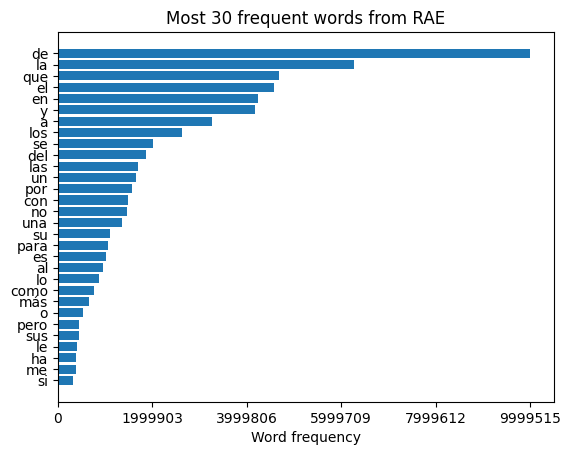

In [6]:
# Create list of the n most frequent words
n = 30
mostFrequentWordsNormFreq = [x[2] for x in reversed(wordList[:n])]
mostFrequentWords = [x[0] for x in reversed(wordList[:n])]
#print(mostFrequentWords)
#print(mostFrequentWordsNormFreq)

# Plot horizontal histogram of the most frequent words
plt.rcdefaults()
fig, ax = plt.subplots()

# Compute the y coordinates for each label
yLabelPosition = range(n)

# Plot histogram
ax.barh(yLabelPosition, mostFrequentWordsNormFreq, align='center')

# Set x and y labels
ax.set_yticks(yLabelPosition)
ax.set_yticklabels(mostFrequentWords)
ax.set_xticklabels(list(range(0, wordMaxFrequency, int(wordMaxFrequency/5))))

# Set axis labels
ax.set_xlabel('Word frequency')
ax.set_title('Most ' + str(n) + ' frequent words from RAE')

# Show plot
plt.show()

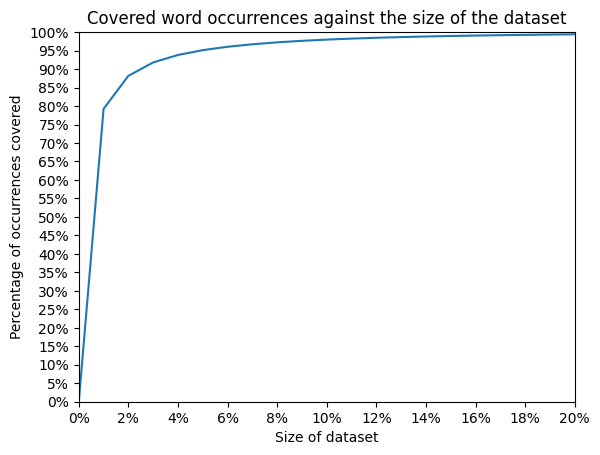

In [7]:
# Print the information related to the Pareto principle
wordTotalLength = len(wordList)
wordTotalAppearances = sum([x[1] for x in wordList])

datasetSize = 20
wordPercentages = list(range(datasetSize + 1))
occurrenceCovered = [0]

for percentage in wordPercentages:
    threshold = int(wordTotalAppearances * ((100 - percentage) / 100))
    temp = 0
    for j in range(wordTotalLength):
        temp += wordList[j][1]
        if temp > threshold:
            #print("Las {} apariciones del total de {}, correspondiente al {:.0f} %, se encuentra en las {} palabras únicas del total de {}, correspondiente al {:.3f} % de los elementos.".format(temp, wordTotalAppearances, 100 * temp / wordTotalAppearances, j, wordTotalLength, 100 * j / wordTotalLength))
            occurrenceCovered.append(100 - 100 * j / wordTotalLength)
            break

# Plot the covered word occurrences against the size of the dataset
fig, ax = plt.subplots()

# Set axis labels
ax.set_title('Covered word occurrences against the size of the dataset')
ax.set_xlabel('Size of dataset')
ax.set_ylabel('Percentage of occurrences covered')
ax.set_ylim(0, 100)
ax.set_xlim(0, datasetSize)

# Format x and y ticks
ax.set_yticks(list(range(0, 105, 5)))
ax.set_yticklabels([str(x) + '%' for x in list(range(0, 105, 5))])

ax.set_xticks(list(range(0, datasetSize + 2, 2)))
ax.set_xticklabels([str(x) + '%' for x in list(range(0, datasetSize + 2, 2))])

# Show plot
ax.plot(occurrenceCovered);

#### 4.1.2 Exploración de las oraciones
Para la exploración de las oraciones se construye una lista de listas de tuplas que contienen los n-grams, ordenados de los más frecuentes a los menos. Asimismo, se ha calculado en cuántos elementos se encuentra la mayoría de las ocurrencias, con el objetivo de determinar cuáles son las predicciones de oraciones más probables y para entender cuántas combinaciones de palabras vale la pena procesar en nuestro modelo para no desperdiciar poder computacional realizando predicciones con pocas ocurrencias.

Esta lista de listas de tuplas es de utilidad para generar un histograma para cada n-gram que muestre la distribución de las $n$ palabras más frecuentes del dataset obtenido de Wikipedia. Además, se muestra una gráfica que muestra la cantidad de ocurrencias de los n-gram cubiertos en función del tamaño del dataset, con el objetivo de determinar si es necesario utilizar todo el dataset o sólo una fracción de este.

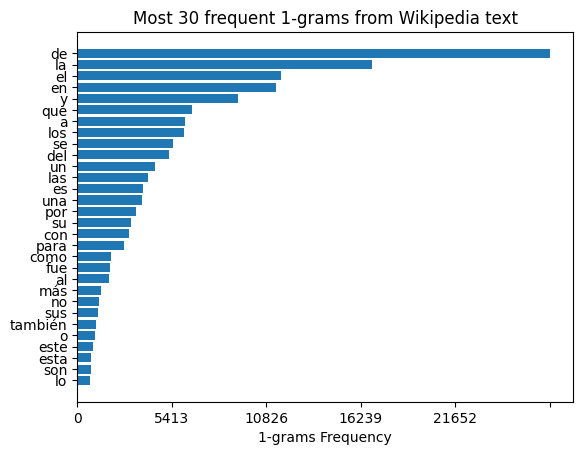

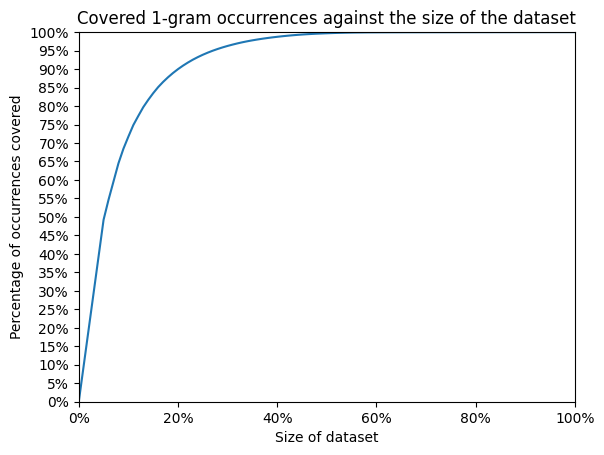

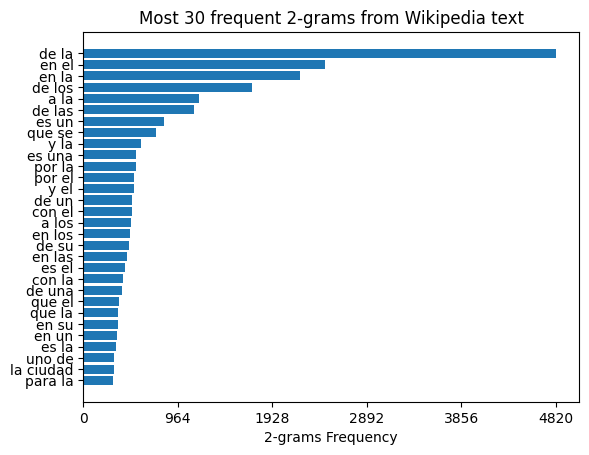

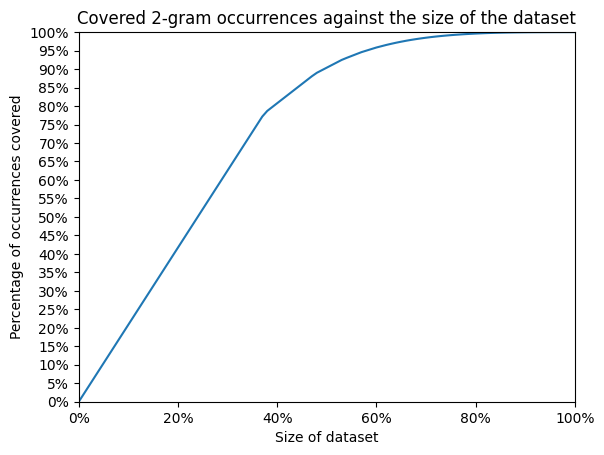

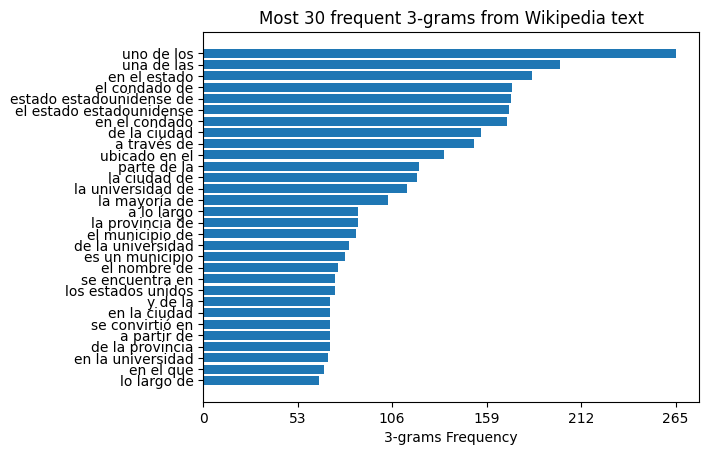

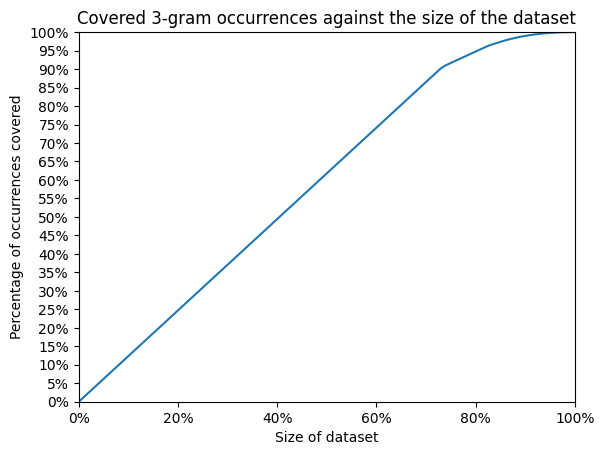

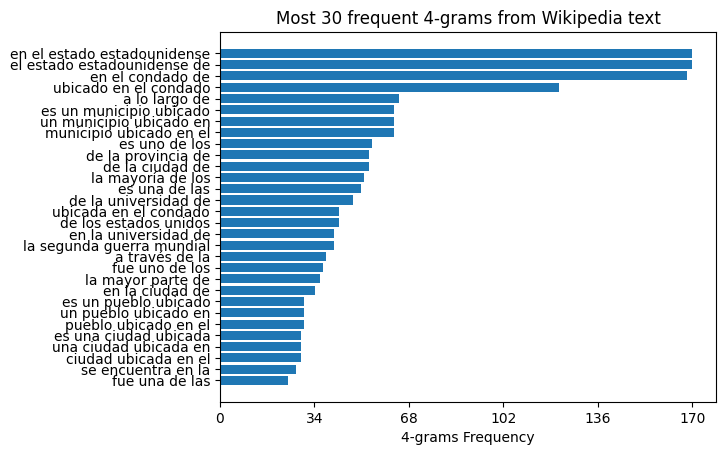

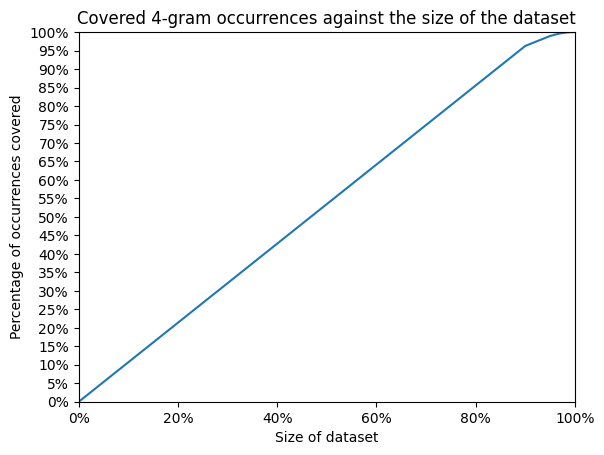

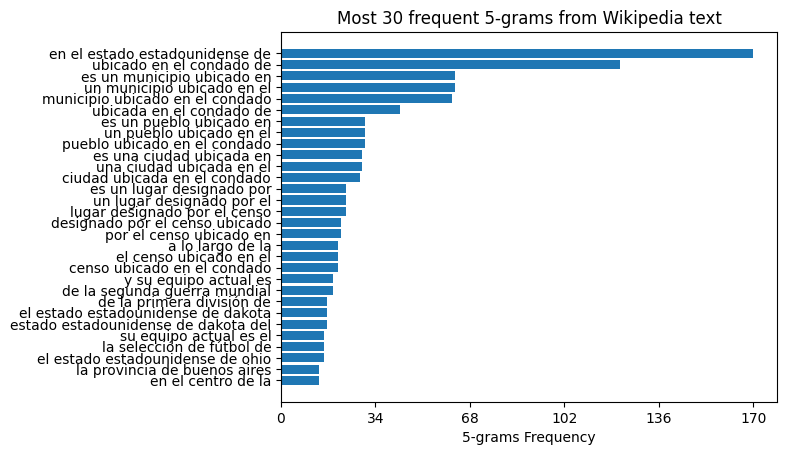

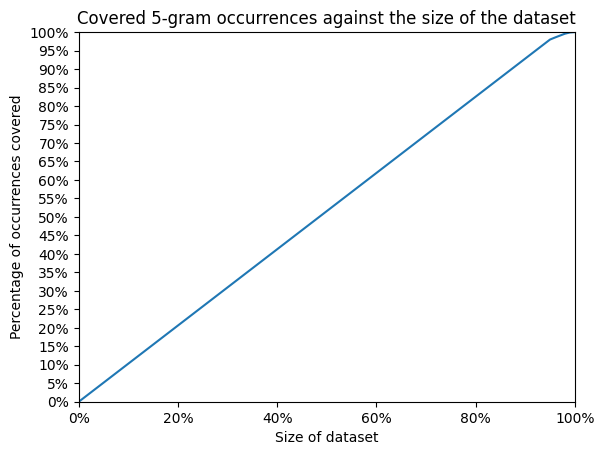

In [8]:
# Create a list of ngrams
ngrams = []

# Define the max n-gram to be computed
maxNGram = 5

# The n most frequent n-grams are plotted
n = 30

for i in range(1, maxNGram + 1):
    # Compute in a list the i-gram
    ngramList = [ngrams for sentence in sentences_df['Sentence'] for ngrams in list(nltk.ngrams(sentence.split(), i))]
    
    # Compute frequency distribution for the i-gram
    distribution = nltk.FreqDist(ngramList)

    # Compute the frequency of the most frequent word which is usefull for normalization
    ngramMaxFrequency = distribution.most_common(1)[0][1]
    
    # Create list of tuples with n-grams, absolute frequency and normalized frequency
    nGramsList = [(' '.join(ngram), int(frequency), frequency / ngramMaxFrequency) for ngram, frequency in distribution.items()] 
    
    # Sort list by n-gram frequency
    nGramsList.sort(reverse=True, key=lambda x: x[-1])

    # Append it to the n-grams list
    ngrams.append(nGramsList)

    # Print the information related to the Pareto principle
    ngramTotalLength = len(nGramsList)
    ngramTotalAppearances = sum([x[1] for x in nGramsList])
    #ngramPercentages = [1, 5, 10, 20]
    datasetSize = 100
    ngramPercentages = list(range(datasetSize + 1))
    occurrenceCovered = [0]
    
    for percentage in ngramPercentages:
        threshold = int(ngramTotalAppearances * ((100 - percentage) / 100))
        temp = 0
        for j in range(ngramTotalLength):
            temp += nGramsList[j][1]
            if temp > threshold:
                #print("Las {} apariciones del total de {}, correspondiente al {:.0f} %, se encuentra en los {} {}-grams únicos del total de {}, correspondiente al {:.3f} % de los elementos.".format(temp, ngramTotalAppearances, 100 * temp / ngramTotalAppearances, j, i, ngramTotalLength, 100 * j / ngramTotalLength))
                occurrenceCovered.append(100 - 100 * j / ngramTotalLength)
                break

    # Create list of the n most frequent words
    mostFrequentNGramNormFreq = [x[2] for x in reversed(nGramsList[:n])]
    mostFrequentNGram = [x[0] for x in reversed(nGramsList[:n])]
    #print(mostFrequentNGram)
    #print(mostFrequentNGramNormFreq)

    ## Plot horizontal histogram of the most frequent words
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Compute the y coordinates for each label
    yLabelPosition = range(n)

    # Plot histogram
    ax.barh(yLabelPosition, mostFrequentNGramNormFreq, align='center')

    # Set x and y labels
    ax.set_yticks(yLabelPosition)
    ax.set_yticklabels(mostFrequentNGram)
    ax.set_xticklabels(list(range(0, ngramMaxFrequency, int(ngramMaxFrequency/5))))

    # Set axis labels
    ax.set_xlabel(str(i) + '-grams Frequency')
    ax.set_title('Most ' + str(n) + ' frequent ' + str(i) + '-grams from Wikipedia text')

    # Show plot
    plt.show()

    ## Plot the covered n-grams occurrences against the size of the dataset
    fig, ax = plt.subplots()

    # Set axis labels
    ax.set_title('Covered {}-gram occurrences against the size of the dataset'.format(i))
    ax.set_xlabel('Size of dataset')
    ax.set_ylabel('Percentage of occurrences covered')
    ax.set_ylim(0, 100)
    ax.set_xlim(0, datasetSize)

    # Format x and y ticks
    ax.set_yticks(list(range(0, 105, 5)))
    ax.set_yticklabels([str(x) + '%' for x in list(range(0, 105, 5))])

    ax.set_xticks(list(range(0, datasetSize + 20, 20)))
    ax.set_xticklabels([str(x) + '%' for x in list(range(0, datasetSize + 20, 20))])

    # Show plot
    ax.plot(occurrenceCovered);

### 4.2 Correlación entre palabras y oraciones
Se estudia además la correlación entre los dos datasets, con el objetivo de estudiar las frecuencias entre las mismas palabras en dos diferentes datasets. Se puede apreciar que la utilización de las palabras tiene una frecuencia normalizada muy similar en ambos datasets, a pesar de tener una naturaleza totalmente diferente.

In [9]:
# Make a dataframe from the list of monograms (i.e. the list containing all single words with its frequency) from the wikipedia text
wordsFromWikipedia_df = pd.DataFrame(ngrams[0], columns=['Word', 'SentencesFrequency', 'SentencesNormFrequency'])

# Make a dataframe from the list of words from the RAE
wordsFromRAE_df = pd.DataFrame(wordList, columns=['Word', 'WordsFrequency', 'WordsNormFrequency'])

# Merge both dataframes intended to be used for styuing their correlation
correlation_df = pd.merge(wordsFromRAE_df, wordsFromWikipedia_df, how='outer', on='Word')

# NaN cells are those that are present in one dataframe but no in the other (i.e. the frequency is 0)
correlation_df.fillna(0, inplace=True)

# Show the merged dataframe
correlation_df

,Word,WordsFrequency,WordsNormFrequency,SentencesFrequency,SentencesNormFrequency
0,de,9999518,1.000000e+00,27065.0,1.000000
1,la,6277560,6.277863e-01,16876.0,0.623536
2,que,4681839,4.682065e-01,6586.0,0.243340
3,el,4569652,4.569872e-01,11675.0,0.431369
4,en,4234281,4.234485e-01,11398.0,0.421134
...,...,...,...,...,...
737793,zzzzzzzzzz,1,1.000048e-07,0.0,0.000000
737794,zzzzzzzzzzzantes,1,1.000048e-07,0.0,0.000000
737795,zzzzzzzzzzzzz,1,1.000048e-07,0.0,0.000000
737796,zzzzzzzzzzzzzzzzz,1,1.000048e-07,0.0,0.000000


La correlación entre ambos datasets es sumamente alta, casi de la unidad.

                    WordsFrequency  SentencesFrequency
WordsFrequency            1.000000            0.981862
SentencesFrequency        0.981862            1.000000


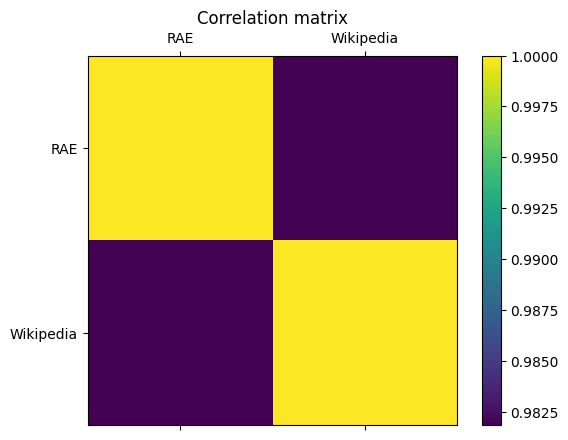

In [10]:
# Plot correlation matrix in order to identify if the word frequencies from wikipedia and RAE texts are similar
fig, ax = plt.subplots()

# Plot correlation matrix
correlation = correlation_df[['WordsFrequency', 'SentencesFrequency']].corr()
print(correlation)
cax = ax.matshow(correlation)
plt.title('Correlation matrix')

# Set correlation labels
ax.set_yticklabels(['RAE', 'Wikipedia'])
ax.set_xticklabels(['RAE', 'Wikipedia'])
ax.set_xticks(range(2))
ax.set_yticks(range(2))

# Show color bar
fig.colorbar(cax)

# Show correlation matrix
plt.show()

La gráfica que muestra las 150 palabras más frecuentes entre ambos datasets, muestra que las mismas palabras tienen frecuencias normalizadas con un comportamiento muy similar.

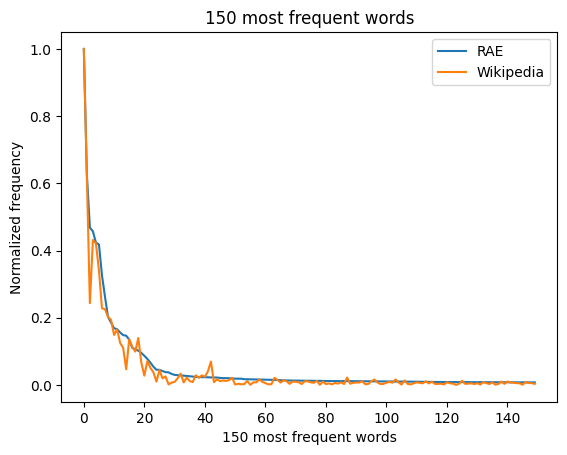

In [11]:
# Plot the n most frequent words to see this correlation in a more visual way
n = 150
fig, ax = plt.subplots()

# Set axis labels
ax.set_title(str(n) + ' most frequent words')
ax.set_xlabel(str(n) + ' most frequent words')
ax.set_ylabel('Normalized frequency')

# Show plot
ax.plot(correlation_df[:n][['WordsNormFrequency', 'SentencesNormFrequency']]);

# Show legends
ax.legend(['RAE', 'Wikipedia']);

### 4.2 Conclusiones
Esta exploración de datos ha permitido obtener conclusiones muy puntuales. Se entiende que para la predicción de las palabras sí se puede utilizar sólo una fracción del total del dataset y aun así continuar ofreciendo predicciones en la mayoría de los casos. De nuestro análisis se supo que el 99% de las ocurrencias de las palabras ocurre con tan solo el 20% de estas, el 95% con tan solo 5%, el 92% con el 2.75%, el 90% con el 2% y el 80% con sólo 0.6%. Es decir, podríamos utilizar únicamente 20,400 palabras, correspondientes al 2.75% del total del dataset y aun así ofrecer predicciones en el 92% de los casos.

Por otro lado, en el análisis de las oraciones se encuentra un comportamiento distinto, sobre todo cuando la cantidad de palabras en el n-gram va incrementando. Por ejemplo, para los 5-grams encontramos que el 80% de las apariciones se encuentra en el 79% los 5-grams únicos, es decir, existen muy pocos 5-grams repetidos, existen muchas ocurrencias únicas, lo que no nos permite descartar los menos frecuentes sin afectar seriamente la calidad de las predicciones.

## 5. Construcción de los modelos

Para la construcción de los modelos que solucionen el problema planteado en el capítulo 1, se ha realizado una investigación exhaustiva de los múltiples algoritmos de identificación de patrones y estructuras de datos existentes. Entre ellos destacan los tries, suffix tries \[11\] y el algoritmo Aho-Corasick \[12\]. Con el objetivo de familiarizarme con estos, he implementados algunos de ellos, a manera de prueba de concepto.

### 5.1 Proceso de construcción de los modelos

Básicamente este proyecto se divide en tres sub-problemas, los cuales deberán trabajar en cascada después de la introducción de cada uno de los caracteres. 

#### 5.1.1 Construcción del modelo de predicción de palabras

El primer sub-problema consiste en realizar sugerencias de la palabra a introducir, para ello se ha elegido la estructura de datos Trie, cuyo nombre proviene de la palabra re**trie**val pues esta es una forma eficiente de recuperar información, en este caso palabras. La estructura de datos Trie tiene forma de árbol, en el cual cada nodo (a excepción de la raíz) contiene un caracter y cada una de las hojas es una palabra completa. Todas las hojas deberán contener alguna forma de saber que contiene el final de una palabra, de modo que, si desde la raíz hasta una de las hojas se forma por ejemplo la palabra "soldado", puede identificarse tanto la palabra "soldado" como la palabra "sol". Adicionalmente, se puede implementar un método para buscar palabras con base en un prefijo, de modo que si se busca el prefijo "sol", se llegue al nodo que contiene la letra "l" en la secuencia $root -> s -> o -> l$ y a partir de ese nodo se realiza una búsqueda, por ejemplo con recorrido pre-orden (DFS) de modo que se regrese una lista con todas las palabras con el prefijo establecido.

Este algoritmo presenta ventajas sobre otras estructuras de datos de rápido acceso como las tablas hash. La principal ventaja es que se pueden buscar palabras a partir de un prefijo, lo que es indispensable para realizar predicciones, otra es que permitirá un cálculo más eficiente de la distancia de Levenshtein \[13\] para la corrección ortográfica, como se verá más adelante, pues permitirá almacenar una porción de la tabla utilizada para la programación dinámica, otra ventaja es que no existirán colisiones en el cálculo de las llaves (o códigos hash), además de que no se tendrán que almacenar las palabras por completo sino que los prefijos de las palabras que constituyan prefijos de otras palabras no estarán duplicados sino que serán nodos comunes entre ambas. Entre las desventajas encontramos que son ligeramente más lentos para acceder a una palabra a partir de su llave, pero esto no es útil para la predicción de palabras.

Para el cálculo de la complejidad de este algoritmo se consideran los siguientes escenarios, donde $m$ es la longitud de la palabra más larga y $n$ la cantidad de las diferentes palabras en el Trie:
* Inserción de una nueva palabra
* Búsqueda de una palabra
* Búsqueda de palabras a partir de un prefijo

##### 5.1.1.1 Complejidad del Trie al insertar una nueva palabra

Para insertar una palabra es necesario iterar sobre cada uno de los caracteres de la palabra lo que tiene una complejidad $O(n)$ y en cada iteración se realizará una operación que dependerá del caso: para los casos en los que el caracter ya existe simplemente se recorre hacia el hijo que corresponda, dado que los nodos hijos están almacenados en un diccionario, la elección del hijo en el que se recorrerá tendrá una complejidad constante $O(1)$, mientras que para los casos en los que el nodo no existe, se creará un nuevo nodo y este se insertará en el diccionario que contiene a los nodos hijo, lo cual también tiene una complejidad constante $O(1)$, por lo tanto la complejidad para insertar una palabra será lineal $O(n)$, mientras que la complejidad para insertar todas las palabras del diccionario será $O(mn)$. Dado que se espera que $n << m$, entonces se puede decir que la complejidad para insertar todas las palabras del diccionario es lineal $O(m)$.

##### 5.1.1.2 Complejidad del Trie al buscar una palabra

La principal ventaja de esta estructura de datos es la obtención de las palabras. En este caso, cuando la palabra a buscar existe, simplemente basta con recorrer el trie caracter a caracter, por lo que la complejidad será lineal $O(n)$.

##### 5.1.1.3 Complejidad del Trie al buscar palabras a partir de un prefijo

Cuando se realiza la búsqueda de palabras basadas en un prefijo, se buscará este en el trie el prefijo caracter a caracter lo cual tendrá una complejidad lineal $O(n)$, pero a partir de ese nodo se deberá realizar una búsqueda en pre-orden, lo que tiene complejidad en el peor caso de $O(mn)$, que como antes se mencionó, dado que $n << m$, entonces se puede decir que la complejidad en el peor caso para buscar palabras con base en un prefijo es lineal $O(m)$, esto sucede cuando se debe recorrer todo el trie desde la raíz, aunque el caso promedio será mucho menor. Finalmente, los resultados son ordenados de modo que se puede identificar cuáles son las palabras más populares, para esto se utiliza el método _sort_ de Python, el cual tiene una complejidad $O(n log n)$ en el peor caso, por lo que la complejidad total en el peor caso será $O(nm + n log n)$ para el peor caso.

In [12]:
from operator import itemgetter

class TrieNode:
    def __init__(self, char='', parent=None):
        # Character to store in the node
        self.char = char.lower()

        # Parent node
        self.parent = parent

        # None if this is not a leaf, otherwise the actual word
        self.word = None

        # Counter of how many times this word has been inserted (only applies for a leaf)
        self.insertedCounter = 0

        # Counter of how many times this word has been used (only applies for a leaf)
        self.usedCounter = 0

        # Dictionary containing children
        self.children = {}

        # Levenshtein distance for spell checking
        self.levenshteinDistance = None

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word, insertedCounter=1, usedCounter=0):
        node = self.root
        # Travel from root to leafs, if word is not already inserted, insert the needed nodes to complete the word
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode(char, node)
            node = node.children[char]
        
        # Mark this node as a leaf
        node.word = word

        # Increment counters, useful for creating Trie from dictionaries with this information.
        node.insertedCounter += insertedCounter
        node.usedCounter += usedCounter

    def searchAllWords(self, foundWords, node, prefix):
        # Make a DFS to all leafs
        # If the current node is marked as the end of a word, add it to the found words list
        if node.word != None:
            #foundWords.append((prefix + node.char, node.usedCounter, node.insertedCounter))
            foundWords.append((node.word, node.usedCounter, node.insertedCounter))

        # Recursively look for all words through the children nodes
        for key, child in node.children.items():
            self.searchAllWords(foundWords, child, prefix + node.char)

    def searchPrefix(self, prefix):
        foundWords = []

        # Travel from the root through the trie with the given prefix
        node = self.root
        notFoundFlag = False
        for char in prefix:
            if char in node.children:
                node = node.children[char]
            else:
                notFoundFlag = True
                break
    
        # If the prefix was not completely found, return the empty list
        if notFoundFlag:
            return foundWords

        # Traverse the trie to get all candidates in the foundWords list
        self.searchAllWords(foundWords, node, prefix[:-1])

        # Return a list of the found word tuples but sorted first by the used counter and then by the inserted counter
        return sorted(foundWords, key = itemgetter(1, 2), reverse=True)
    
    def markAsUsed(self, word, usedCounter=1):
        # Travel from the root through the trie with the given prefix
        node = self.root
        for char in word:
            if char in node.children:
                node = node.children[char]
            else:
                # The word was not found so return False
                return False
        
        # The word's used counter was incremented so return True
        node.usedCounter += usedCounter
        return True

Como se demostró en la sección de exploración de los datos, es suficiente mantenerse con únicamente las 20,400 palabras más frecuentes, correspondientes al 2.75% de estas, y con ello estaremos almacenando las palabras con el 92% del total de las ocurrencias. Por tal razón, se crea el trie e insertamos únicamente esta porción de las palabras reduciendo así significativamente el tiempo y espacio en el que operará nuestro algoritmo.

In [13]:
# Stay with only the most used 2.75% words, which are present in the 92% of the cases
words_df = words_df[:20400]

# Create the empty trie
wordsTrie = Trie()

# And then insert all the words gotten from the dictionary
for word in words_df.itertuples(index=False):
    wordsTrie.insert(word.Word, insertedCounter=word.Frequency)

En el trie que he definido, se han agregado dos atributos que nos permitirán determinar cuáles son las palabras más populares, de modo que las predicciones dependan del uso de estas. Uno de estos atributos será un contador de la cantidad de veces que una palabra se ha intentado introducir en el trie y el otro la cantidad de veces que una palabra se ha utilizado, de esta manera se realizarán primero las predicciones de las palabras con más uso y posteriormente con más inserciones.

In [14]:
# Search for prefix 'mex'
foundWords = wordsTrie.searchPrefix('mex')
for i in foundWords:
    print(i)

# 'toledo' was found as the most inserted word, now mark 'tolerar' as used
wordsTrie.markAsUsed('mexicanas')
print("\n'mexicanas' has been marked as used so it will be suggested with more priority than others that haven't been used yet\n")

# Search for prefix 'mex'
foundWords = wordsTrie.searchPrefix('mex')
for i in foundWords:
    print(i)

# "mexicanas" was found first in the list since it's already used

('mexicano', 0, 7547)
('mexicana', 0, 5708)
('mexicanos', 0, 5206)
('mexicanas', 0, 1151)

'mexicanas' has been marked as used so it will be suggested with more priority than others that haven't been used yet

('mexicanas', 1, 1151)
('mexicano', 0, 7547)
('mexicana', 0, 5708)
('mexicanos', 0, 5206)


#### 5.1.2 Construcción del modelo de corrección de las palabras

Para la corrección de las palabras he decidido utilizar diferentes algoritmos. El principio utilizado será la distancia de Levenshtein, el cual es un algoritmo que se puede ejecutar mediante programación dinámica para calcular la cantidad de operaciones que se tienen que hacer a una cadena $s1$ para convertirla en otra cadena $s2$, por lo que esta distanica puede ser utilizada como una medida de similitud entre ambas cadenas de texto, donde a menos cambios más similitud. Dado que se tiene que calcular esta distancia entre la palabra que se desea corregir y la totalidad de las palabras insertadas en el trie, se aprovechará esta estructura para reutilizar la distancia de los nodos padre, de modo que se puedan reutilizar los cálculos de los nodos para los cuales ya se realizó el cálculo.

En su forma original, la complejidad para realizar el cálculo de la distancia de Levenshtein tiene una complejidad $O(m_1 m_2)$, donde $m_1$ es la cantidad de caracteres en la cadena $s1$ y $m_2$ la cantidad de caracteres en la cadena $s2$. Dado que $m_1 \approx m_2$, se dice entonces que la complejidad es cuadrática $O(m^2)$.

Si consideramos que este cálculo se tendría que realizar para cada una de las palabras en el trie, esta complejidad es $O(m^2 n)$, pero dado que $n>>m^2$, se puede decir que la complejidad de este cálculo es cuadrática $O(m^2)$.

In [15]:
def levensteinDistance(str1, str2):
    mat = [[0]*(len(str2) + 1) for x in range (len(str1) + 1)]

    for i in range(len(str1) + 1):
        mat[i][0] = i
    for i in range(len(str2) + 1):
        mat[0][i] = i
    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            mat[i][j] = min(mat[i][j-1] + 1, mat[i-1][j] + 1, mat[i-1][j-1] + (0 if str1[i-1].lower() == str2[j-1].lower() else 1))
    
    return mat[-1][-1]

str1 = 'vaca'
strings = ['baca', 'baja', 'vida', 'honor']
for str2 in strings:
    distance = levensteinDistance(str1, str2)
    print('String 1: "' + str1 + '", String 2: "' + str2 + '", Distance: ' + str(distance) + ", Similarity:", str(1 - distance / max(len(str1), len(str2))) + '%')

String 1: "vaca", String 2: "baca", Distance: 1, Similarity: 0.75%
String 1: "vaca", String 2: "baja", Distance: 2, Similarity: 0.5%
String 1: "vaca", String 2: "vida", Distance: 2, Similarity: 0.5%
String 1: "vaca", String 2: "honor", Distance: 5, Similarity: 0.0%


Para realizar el cálculo de la similitud entre cadenas de texto para la sugerencia de palabras cuando esta tiene faltas de ortografía de una manera más eficiente, se crea una nueva clase _LevenshteinTrie_ que hereda los métodos y atributos de la clase _Trie_ pero además implementa un nuevo método para calcular la distancia de Levenshtein en cada nodo, el cual se basa en la búsqueda de palabras _search_ de la clase padre. A diferencia del método original para calcular esta distancia, en donde la complejidad era cuadrática para cada nodo, en este caso, para cada nodo sólo se tendrá que calcular un nuevo renglón de la matriz de distancias, de modo que la complejidad se reduce a complejidad lineal $O(m)$. 

Adicionalmente, se obtiene ventaja utilizando backtracking en lugar del enfoque de fuerza bruta, de modo que no tengamos que buscar por ramas que no aparentan aportar potenciales predicciones. En este caso he definido que a partir del segundo nivel (es decir, a partir de la tercera letra de una palabra), se hace un cálculo de la similitud de la palabra del Trie contra la palabra para la cual se están buscando palabras similares,de modo que, si la rama actual no es similar en al menos un umbral fijo, no se procede con el cálculo de todos los nodos hijos, reduciendo así de manera importante la complejidad computacional. En este caso he definido el umbral en una similitud del 50%.

Finalmente, se crea un nuevo método que fusione la predicción de palabras basadas en un prefijo y en la similitud. Para ello, además de la palabra de entrada se recibe como argumento la cantidad de palabras que se desea obtener como predicción. Se otorga prioridad a la búsqueda de resultados con base en un prefijo, si las palabras recibidas no cumplen con la cantidad de palabras para predecir deseadas se hace uso del cálculo de la similitud y se agregan a la lista de la primera búsqueda.

In [16]:
from operator import itemgetter

class LevenshteinTrie(Trie):
    def __init__(self):
        self.root = TrieNode()

    def computeLevenshteinDistance(self, word, similarityThreshold=0.5):
        result = []
        self._computeLevenshteinDistance(self.root, word, result, similarityThreshold)
        # Potential improvement: use a priority queue and just insert words with a similarity greater than the nth most similar word to reduce space complexity
        return sorted(result, key = itemgetter(1), reverse=True)

    def _computeLevenshteinDistance(self, node, word, result, similarityThreshold=0.5):
        # Make a DFS to all leafs
        # Initialize the tempDistance list with len(word) + 1 elements
        node.levenshteinDistance = list(range(len(word) + 1))
        
        # If this is not the trie's root, compute the Levenshtein distance for this node re-using the parent's distance array
        if node.parent:
            node.levenshteinDistance[0] = node.parent.levenshteinDistance[0] + 1
            for i in range(1, len(word) + 1):
                node.levenshteinDistance[i] = min(node.levenshteinDistance[i-1] + 1, node.parent.levenshteinDistance[i] + 1, node.parent.levenshteinDistance[i-1] + (0 if node.char == word[i-1].lower() else 1))
                
        # If the current node is marked as the end of a word, add it to the found words list if it's similarity is greater than a fixed threshold
        if node.word:
            similarity = 1 - node.levenshteinDistance[-1] / max(len(word), len(node.levenshteinDistance) - 1)
            if similarity >= similarityThreshold:
                result.append((node.word, similarity))

        # Call the recursion to continue the Levenshtein calculation in the three only if the similarity of the already computed sub-string is grater than a fixed threshold
        similarity = 1
        level = node.levenshteinDistance[0]
        if level > 2:
            index = min(level, len(word))
            similarity = 1 - node.levenshteinDistance[index] / index
    
        if similarity >= similarityThreshold:
            # Recursively look for all words through the children nodes
            for key, child in node.children.items():
                self._computeLevenshteinDistance(child, word, result)

    def search(self, prefix, predictionsAmount=5):
        # Convert prefix in lowers
        prefix = prefix.lower()
        
        # Search for words whose prefix is a prefix
        result = self.searchPrefix(prefix)

        # If the n nedded words were not acquired, look for similar words
        if len(result) < predictionsAmount:
            result += self.computeLevenshteinDistance(prefix)

        # Add resulting words to a list
        result = [i[0] for i in result[:predictionsAmount+1]]

        # And delete duplicates, in the case that the prefix is a complete word and was found with both methods
        predictions = []
        for i in result:
            if i not in predictions:
                predictions.append(i)
        return predictions

Se crea el Trie con capacidades de calcular la distancia de Levenshtein y se insertan las mismas palabras que se introdujeron al Trie original. Este Trie sustituye al otro que fue utilizado sólo con fines demostrativos, a partir de ahora sólo se utilizará este.

In [17]:
# Create the empty trie
wordsLevenshteinTrie = LevenshteinTrie()

# And then insert all the words gotten from the dictionary
for word in words_df.itertuples(index=False):
    wordsLevenshteinTrie.insert(word.Word, insertedCounter=word.Frequency)

Para probar el método recién implementado, se calcula la similitud de la palabra mal escrita "baca" y se imprimen los resultados con una similitud mayor al umbral del 50%. Se puede apreciar que la ejecución se realiza con suma velocidad.

In [18]:
# Compute the Levenshtein distance for the wrong spelled word 'baca'
result = wordsLevenshteinTrie.computeLevenshteinDistance('baca')

# Print the most similar words
for i in result:
    print(i)

('laca', 0.75)
('saca', 0.75)
('vaca', 0.75)
('baja', 0.75)
('barca', 0.75)
('basa', 0.75)
('banca', 0.75)
('bata', 0.75)
('bala', 0.75)
('bach', 0.75)
('baza', 0.75)
('boca', 0.75)
('beca', 0.75)
('yacía', 0.5)
('ala', 0.5)
('ana', 0.5)
('ac', 0.5)
('acá', 0.5)
('acb', 0.5)
('ama', 0.5)
('aa', 0.5)
('sacar', 0.5)
('sacan', 0.5)
('sacó', 0.5)
('saco', 0.5)
('paco', 0.5)
('ca', 0.5)
('cacao', 0.5)
('nace', 0.5)
('nací', 0.5)
('nacía', 0.5)
('mac', 0.5)
('oca', 0.5)
('hace', 0.5)
('hacia', 0.5)
('hacía', 0.5)
('hacha', 0.5)
('tac', 0.5)
('taco', 0.5)
('vacía', 0.5)
('vacas', 0.5)
('bajo', 0.5)
('bajar', 0.5)
('bajas', 0.5)
('bajan', 0.5)
('bajó', 0.5)
('bajé', 0.5)
('baje', 0.5)
('bar', 0.5)
('barco', 0.5)
('barra', 0.5)
('barba', 0.5)
('barça', 0.5)
('barda', 0.5)
('base', 0.5)
('basta', 0.5)
('basan', 0.5)
('basó', 0.5)
('banco', 0.5)
('banda', 0.5)
('bank', 0.5)
('banal', 0.5)
('bate', 0.5)
('baño', 0.5)
('baila', 0.5)
('balas', 0.5)
('balsa', 0.5)
('bah', 0.5)
('bahía', 0.5)
('bacon'

Se prueba el método que conjunta los algoritmos de búsqueda a partir de un prefijo y el de palabras similares simulando que se ha introducido la palabra "hola" y se indica que se obtengan hasta sugerencias. Se aprecia en el resultado que primero se sugieren palabras donde la cadena "hola" es un prefijo como "holanda" y posteriormente se sugieren palabras similares como "lola", "sola" y "cola".

In [19]:
n = 15
prefix = 'hola'
result = wordsLevenshteinTrie.search(prefix, n)

for i in result:
    print(i)

holanda
holandés
hola
holandesa
holandeses
lola
sola
cola
ola
hora
hoja
bola
dolía
dole
la


#### 5.1.3 Construcción del modelo de predicción de oraciones

La predicción de las oraciones se basa en el algoritmo de Boyer-Moore, el cual permite encontrar patrones de texto. Su principal aplicación es encontrar una cadena de texto dentro de otra cadena de texto, pero su uso se puede extender a encontrar patrones de tokens dentro de una secuencia más grande de tokens, recordando que un token puede ser una palabra y no sólo un caracter.

Este algoritmo tiene una complejidad computacional de $O(n)$, donde $n$ es la longitud del texto en el que se buscará el patrón. Si consideramos que esta búsqueda se hará en $m$ oraciones, la complejidad asciende hasta $O(mn)$, dado que $m>>n$ podemos afirmar que la complejidad es lineal $O(m)$. 

In [20]:
def boyerMoore(text, pattern):
    matches = []
    # Create bad word list in a dictionary
    badWord = {pattern[i]:max(1, len(pattern) - i - 1) for i in range(len(pattern))}

    # Initialize text index
    textIndex = len(pattern) - 1

    while textIndex < len(text):
        match = True
        for i in range(len(pattern)):
            # Check if characters match
            if text[textIndex - i] != pattern[-i-1]:
                match = False
                # Increment index
                textIndex += badWord[text[textIndex - i]] if text[textIndex - i] in badWord else len(pattern)
                break

        # Check if a match was found
        if match:
            matches.append(textIndex - len(pattern) + 1)
            textIndex += 1

    return matches

text = 'this is a test'
#pattern = 'test'
pattern = 'is'

match = boyerMoore(text, pattern)
print(match)

[2, 5]


La estrategia que se sigue para la predicción de las oraciones es almacenarlas todas en forma de tokens en una lista, junto con un contador que diga cuántas veces se ha utilizado cada una, siempre ordenada, de modo que se comience a buscar por un patrón que ofrezca una predicción en cada una de las oraciones partiendo de las más frecuentes. La búsqueda termina tan pronto como se haya encontrado la cantidad de predicciones establecida. Adicionalmente, he definido varios niveles de coincidencia (matching), se busca siempre por los patrones más largos y posteriormente por patrones más cortos, hasta que se haya logrado obtener una cantidad dada de predicciones. Es decir, primero busco oraciones que contengan, por ejemplo, las últimas 5 palabras que he introducido en mi oración, si no encuentro las oraciones suficientes después busco un patrón con las últimas 4 palabras de mi oración y así sucesivamente.

Para esto, he definido dos clases. La clase _Sentence_ almacena una oración en forma de tokens y un contador que indica cuántas veces se ha aceptado esta oración como predicción. La clase _SentencePrediction_ contiene una lista con todos los objetos de la clase _Sentence_ y los métodos para realizar la búsqueda de predicciones.

In [21]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import word_tokenize

class Sentence:
    def __init__(self, sentence):
        # Tokenized sentence to store in the object
        self.sentence = word_tokenize(sentence.lower())

        # Counter of how many times this sentence has been used
        self.usedCounter = 0

class SentencePrediction:
    def __init__(self):
        # List of tokenized sentenses
        self.sentences = []

    def insert(self, sentence, usedCounter=0):
        # Create a new Sentence object and append it to the sentences list
        self.sentences.append(Sentence(sentence))

    def searchMatchInSentence(self, text, pattern, predictedSentences, id=0):
        # Look for the pattern in the current sentence
        matches = boyerMoore(text, pattern)

        # If the pattern exists in this sentence (and it's not the end of the sentence), append from the first match to the end of the sentence to the list
        if len(matches) > 0 and len(text[matches[0]:]) > len(pattern):
            predictedSentences.append((TreebankWordDetokenizer().detokenize(text[matches[0]:]), len(pattern), id))
            return True
        return False
 
    def search(self, pattern, predictionsAmount=5, maxPatternLength=5):
        predictedSentences = []
        foundIDs = []
        
        # Tokenize the pattern
        patternTokenized = word_tokenize(pattern)
        
        # Start from maxPatternLength to look for longer patterns first
        for patternLength in range(min(maxPatternLength, len(patternTokenized)), 0, -1):
            # Trim the pattern
            tempPattern = patternTokenized[-patternLength:]

            # Iterate all over the entire sentences list
            for i in range(len(self.sentences)):
                # Only add this sentence if it hasn't added with a longer pattern yet
                if i not in foundIDs:
                    # If the prediction has results, add this ID to the found IDs list so it's not added again later
                    if self.searchMatchInSentence(self.sentences[i].sentence, tempPattern, predictedSentences, i):
                        foundIDs.append(i)
                # If the amount of desired predictions is reached, return
                if len(predictedSentences) > predictionsAmount:
                    return predictedSentences
        return predictedSentences

    def markAsUsed(self, id):
        # Increment the sentence with id id
        self.sentences[id].usedCounter += 1

        # Sort the sentences list based on usage frequency
        self.sentences.sort(key=lambda x: x.usedCounter, reverse=True)
        #return sorted(result, key = itemgetter(1), reverse=True)

Se crea el objeto _SentencePrediction_ y posteriormente se introducen todas y cada una de las oraciones del data frame de Pandas _sentences_df_.

In [22]:
# Create the empty object
sentencePrediction = SentencePrediction()

# And then insert all the words gotten from the dictionary
for sentence in sentences_df['Sentence']:
    sentencePrediction.insert(sentence)

En esta clase he definido el método _search_ que realiza el proceso previamente descrito y retorna una lista de predicciones. Esta lista contiene las oraciones dentro de una tupla, junto con la cantidad de palabras del patrón que se han encontrado y un ID, que indica el índice de la oración en la lista que las contiene, el cuál servirá posteriormente para marcar la oración como usada y que así sea sugerida con mayor prioridad la próxima vez.

In [23]:
# Look for predictions for the pattern 'la carrera de la'
result = sentencePrediction.search('la carrera de la')
for i in result:
    print(i)

# 'la carrera de la arquitectura' was found as the most used sentence, now mark 'de la liga hanseática' as used
sentencePrediction.markAsUsed(6)
print("\n'de la liga hanseática' has been marked as used so it will be suggested with more priority than others that haven't been used yet with the same amount of words in the matched pattern\n")

# Look for predictions for the pattern 'la carrera de la'
result = sentencePrediction.search('la carrera de la')
for i in result:
    print(i)
# 'de la liga hanseática' was found first in the list since it's already used


('la carrera de la arquitectura', 4, 7153)
('carrera de la mano de dr dre', 3, 5641)
('carrera de la cantante', 3, 20043)
('de la asociación', 2, 0)
('de la cultura maorí', 2, 1)
('de la liga hanseática', 2, 6)

'de la liga hanseática' has been marked as used so it will be suggested with more priority than others that haven't been used yet with the same amount of words in the matched pattern

('la carrera de la arquitectura', 4, 7153)
('carrera de la mano de dr dre', 3, 5641)
('carrera de la cantante', 3, 20043)
('de la liga hanseática', 2, 0)
('de la asociación', 2, 1)
('de la cultura maorí', 2, 2)


### 5.2 Conclusiones

Para la construcción de los modelos se tuvo que realizar una investigación amplia de las opciones de algoritmos y estructuras de datos existentes y así poder realizar una elección más informada y acertada de estos para la implementación de mi caso específico de uso. Para la corrección ortográfica y las palabras creo que he elegido la estructura de datos y los algoritmos adecuados para realizar la predicción de manera eficiente, sin embargo, para las oraciones creo que aún hay espacio para la mejora. Dado que la predicción de las oraciones requiere de un procesamiento bastante amplio del texto, los algoritmos que estuvieron a mi alcance me parece que no hacen un trabajo óptimo por lo que sería necesario definir algo más complejo para que sea imperceptible la predicción. Sin embargo, para el alcance de este proyecto creo que el trabajo es suficiente.



## 6. Presentación de resultados

En esta sección se presenta una aplicación que permite concentrar los resultados del proyecto en conjunto. Se ha implementado una GUI que utiliza tanto las predicciones de palabras, su corrección ortográfica y la predicción de las oraciones trabajando en conjunto.

### 6.1 Presentación de resultados

Para presentar el resultado de este proyecto se crea una aplicación que conjunta la corrección ortográfica de palabras, la predicción de palabras y la predicción de oraciones. Evidentemente este es un problema que se separa en los tres sub-problemas descritos en el capítulo 5. La idea general de la aplicación en la GUI es la siguiente:

1. Para la predicción de palabras, el usuario escribe algunos caracteres y se verifica si esta palabra es un prefijo dentro del trie:

    1.1 Si sí es un prefijo se realizan predicciones de palabras a partir del nodo que contiene el prefijo escrito mediante una búsqueda en el trie.

    1.2 Si no es un prefijo se intuye que es una palabra que no existe, por lo que se considera que hay errores ortográficos en la palabra para lo que se compara la palabra escrita contra la lista de diccionarios y se calcula la similitud.

    En caso de que la palabra no exista y posteriormente se escriba un espacio en lugar de aceptar alguna de las predicciones, se considera que es una palabra nueva por lo que esta se inserta en el Trie para que pueda ser considerada para futuras sugerencias. Así mismo, independientemente de si se inserta la nueva palabra o se acepta alguna de las predicciones, la palabra escrita se marca como utilizada por lo que será considerada con mayor prioridad las próximas ocasiones en las que se escriba un prefijo de esa palabra.

2. Para la predicción de oraciones existen dos casos:

    2.1 Que la palabra anterior es una palabra completa, es decir, hay un espacio después de la última palabra para lo que se toma la oración completa como un prefijo para buscar contra la lista de oraciones.

    2.2 Que la palabra anterior aún no está completa, para lo que se comienzan a hacer comparaciones contra la lista de oraciones utilizando como prefijos las oraciones que se forman agregando las sugerencias de palabras a la oración ya escrita, comenzando con la predicción de la palabra más acertada.

    En el caso de la predicción de las oraciones se da prioridad a las oraciones que contienen una cantidad más larga de palabras que coinciden en un orden específico.

Para la aplicación se ha creado una Interfaz Gráfica (GUI) con la librería [tkinter](https://docs.python.org/3/library/tkinter.html) \[14\]. La cual consiste en una caja de texto donde el usuario podrá comenzar a introducir texto, una serie de botones del lado izquierdo y otra serie de botones del lado derecho, las cuales mostrarán las $n$ sugerencias de palabras y de oraciones, respectivamente. Haciendo click en alguno de estos botones se inserta en el texto la sugerencia.

In [24]:
import tkinter as tk
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer

class GUI(object):
    def __init__(self, master, **kwargs):
        # User's var
        self.str = ''
        self.wordComplete = True

        # Window configuration
        self.master = master
        self.master.title('Predicción de palabras y oraciones')
        #self.master.geometry(str(WIDTH) + 'x' + str(15*(15+1+HEIGHT)))
        self.master.config(bg='white')

        # Menu
        # Main menu
        menu = tk.Menu(self.master)
        menu.add_command(label='Reset Application', command=self.resetApp)
        menu.add_command(label='Quit Application', command=self.master.destroy)

        # Options cascade
        #options = tk.Menu(menu)
        #options.add_command(label='Reset Application', command=self.resetApp)
        #menu.add_cascade(label='Options', menu=options)

        # Activate menu
        self.master.config(menu=menu)

        # Register keys
        self.master.bind('<KeyPress>', self.keyPress)

        # Text widget
        self.text = tk.Text(self.master)
        self.text.grid(columnspan=2)

        # Text Scrollbar
        #self.scrollbar = tk.Scrollbar(self.master)
        #self.scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        #self.scrollbar.grid(row=0, column=0, columnspan=2)

        #self.text = tk.Text(self.master, height=HEIGHT, width=WIDTH)
        #self.scrollbar.config(command=self.text.yview)
        #self.text.config(yscrollcommand=self.scrollbar.set)

        # Label for debug
        #self.label = tk.Label(self.master, compound = tk.CENTER, text='')
        #self.label.grid(row=0, column=1, columnspan=2)
        #self.label.config(text=str('Prediction 1 was selected'))

        # Words label
        self.wordsLabel = tk.Label(self.master, compound = tk.CENTER, text='Predicción de palabras')
        self.wordsLabel.config(bg='white')
        self.wordsLabel.grid(column=0, row=2)

        # Sentences label
        self.sentencesLabel = tk.Label(self.master, compound = tk.CENTER, text='Predicción de oraciones')
        self.sentencesLabel.config(bg='white')
        self.sentencesLabel.grid(column=1, row=2)

        # Buttons
        self.wordButtonsAmount = 5
        self.sentenceButtonsAmount = 5
        self.wordButtons = [tk.Button()] * self.wordButtonsAmount
        self.sentenceButtons = [tk.Button()] * self.sentenceButtonsAmount

        for i in range(self.wordButtonsAmount):
            self.wordButtons[i] = tk.Button(self.master, command=lambda buttonIndex=i: self.wordButtonAction(buttonIndex))
            self.wordButtons[i].grid(column=0, row=3+i)

        for i in range(self.sentenceButtonsAmount):
            self.sentenceButtons[i] = tk.Button(self.master, command=lambda buttonIndex=i: self.sentenceButtonAction(buttonIndex))
            self.sentenceButtons[i].grid(column=1, row=3+i)

        # Make a first prediction so buttons have text
        self.addWordPredictions('')
        self.addSentencePredictions('')

    def resetApp(self):
        self.text.delete(1.0, tk.END)

        # User's var
        self.str = ''
        self.wordComplete = True

    def quitApp(self):
        self.master.destroy()

    def hideButtons(self, buttons, indexes):
        for index in indexes:
            buttons[index].grid_forget()

    def showButtons(self, buttons, indexes, column):
        for index in indexes:
            buttons[index].grid(column=column, row=3+index)

    def removeWord(self, string, start=0, end=0):
        if end != 0:
            result = string.split()[start:-end]
        else:
            result = string.split()[start:]
        return ' '.join(result)

    def addWord(self, string, word):
        newString = string
        if len(string) != 0 and string[-1] != ' ':
            newString += ' '
        newString += word
        return newString

    def updateWords(self):
        # Get text from widget text
        self.str = self.text.get('1.0','end-1c')

        self.lastSentence = ''
        self.lastWord = ''

        # Update lastSentence and lastWord attributes if the text box is not empty
        if len(self.str) > 0:
            self.lastSentence = nltk.sent_tokenize(self.str)[-1]

            if len(self.lastSentence) > 0:
                self.lastWord = word_tokenize(self.lastSentence)[-1]

    # Method called when a key in the keyboard has been pressed
    def keyPress(self, event):
        # Update attributes based on text box
        self.updateWords()

        # If an space was introduced, it's assumed that a new word (without a prediction) was inserted, so mark it as used
        if ' ' == event.char:
            result = wordsLevenshteinTrie.markAsUsed(self.lastWord)
            self.wordComplete = True

            # If word was not found while marking it as used, insert it to the trie
            if not result:
                wordsLevenshteinTrie.insert(self.lastWord, usedCounter=1)
        # If the last character was deleted, assume the word is still complete, so when inserting a sentence from the prediction
        # list, this last word is not removed
        elif '\x08' == event.char:
            self.wordComplete = True
        else:
            self.wordComplete = False

        # Add new word predictions since a new character was inserted
        self.addWordPredictions(self.lastWord)

        # Since a new character has been written, and therefore new word predictions are available, compute also sentence predictions
        self.addSentencePredictions(self.lastSentence)

        # Since the already inserted characters match the first word prediction, assume that it's correct so this word is marked as complete,
        # so if a new sentence prediction is inserted, this last word is not removed
        if self.lastWord == self.wordPrediction[0]:
            self.wordComplete = True

    # Method called when one of the word prediction buttons has been pressed
    def wordButtonAction(self, buttonIndex):
        if not self.wordComplete:
            # Delete last word from text widget and append prediction to the end of text widget
            self.str = self.removeWord(self.str, end=1)

        # And insert the selected word
        self.str = self.addWord(self.str, self.wordPrediction[buttonIndex])

        # Since a new word has been introduced, it's a completed one for sure
        self.wordComplete = True

        # Delete last word from text widget and append prediction to the end of text widget
        self.text.delete(1.0, tk.END)
        self.text.insert(tk.END, self.str)

        # Update object words
        self.updateWords()

        # Mark the last word as used
        result = wordsLevenshteinTrie.markAsUsed(self.lastWord)

        # If word was not found while marking it as used, insert it to the trie
        if not result:
            wordsLevenshteinTrie.insert(self.lastWord, usedCounter=1)

        # Compute predictions for new words
        self.addWordPredictions(self.lastWord)
        self.addSentencePredictions(self.lastSentence)

    # Method called when one of the sentence prediction buttons has been pressed
    def sentenceButtonAction(self, buttonIndex):
        if not self.wordComplete:
            # Delete last word from text widget and append prediction to the end of text widget
            self.str = self.removeWord(self.str, end=1)

        # And insert the selected sentence
        sentence = self.sentencePrediction[buttonIndex]
        self.str = self.addWord(self.str, self.removeWord(sentence[0], start=(sentence[1] - (1 if self.sentencesWithCompleteWord <= buttonIndex else 0)) if len(self.str) != 0 else 0))

        # Mark the selected sentence as used
        sentencePrediction.markAsUsed(sentence[2])

        # Since a new word has been introduced, it's a completed one for sure
        self.wordComplete = True

        # Delete last word from text widget and append prediction to the end of text widget
        self.text.delete(1.0, tk.END)
        self.text.insert(tk.END, self.str)

        # Update object words
        self.updateWords()

        # Compute predictions for new words
        self.addWordPredictions(self.lastWord)
        self.addSentencePredictions(self.lastSentence)

    # Method that computes word predictions, which are placed in the buttons
    def addWordPredictions(self, currentWord):
        # Look for predictions of current word
        self.wordPrediction = wordsLevenshteinTrie.search(currentWord)

        # Set buttons text
        for i in range(min(self.wordButtonsAmount, len(self.wordPrediction))):
            self.wordButtons[i]['text'] = str(self.wordPrediction[i])
            #self.wordButtons[i]['text'] = str(self.wordPrediction[i][0])

        # Show only buttons with predictions
        self.hideButtons(self.wordButtons, range(self.wordButtonsAmount))
        self.showButtons(self.wordButtons, range(min(self.wordButtonsAmount, len(self.wordPrediction))), 0)

    # Method that computes sentence predictions, which are placed in the buttons
    def addSentencePredictions(self, pattern):
        if len(pattern) <= 0:
            pattern = self.wordPrediction[0]

        # Look for predictions of current word
        self.sentencePrediction = sentencePrediction.search(pattern, maxPatternLength=3)

        self.sentencesWithCompleteWord = len(self.sentencePrediction)

        # If the current word is not complete and the sentence predictions are not enough for all buttons,
        # append the word predictions to the pattern and search for new sentence predictions
        if not self.wordComplete:
            index = 0
            while len(self.sentencePrediction) < self.sentenceButtonsAmount and len(self.wordPrediction) >= index and index < self.sentenceButtonsAmount:
                # Look for predictions of current word
                self.sentencePrediction += sentencePrediction.search(self.addWord(self.removeWord(pattern, end=1), self.wordPrediction[index]))
                # Increment the word prediction index
                index += 1

        # Set buttons text
        for i in range(min(self.sentenceButtonsAmount, len(self.sentencePrediction))):
            self.sentenceButtons[i]['text'] = str(self.sentencePrediction[i][0])

        # Show only buttons with predictions
        self.hideButtons(self.sentenceButtons, range(self.sentenceButtonsAmount))
        self.showButtons(self.sentenceButtons, range(min(self.sentenceButtonsAmount, len(self.sentencePrediction))), 1)

root = tk.Tk()
app = GUI(root)
root.mainloop()

### 6.2 Conclusiones

La GUI ha permitido mostrar de manera más visual el funcionamiento de los algoritmos implementados para este proyecto. Dado que la GUI no es el objetivo principal de este proyecto, no se ha profundizado en la corrección de errores en tiempo de ejecución por lo que es posible que estos existan. Adicionalmente, dado que se encuentra fuera del alcance del proyecto, si se escribe con una gran velocidad en el cuadro de texto de la GUI, cada tecla se almacena en una cola interna de la librería Tkinter por lo que se verá una ejecución muy lenta pues se ejecutarán los algoritmos para cada uno de los caracteres. La forma de solucionar este problema es mediante el manejo de los eventos de la librería de una manera más adecuada.

## 7. Conclusiones

En esta sección se muestran las conclusiones generales del desarrollo de este proyecto, el trabajo que se podría desarrollar a futuro, así como una breve recapitulación de los conocimientos y la experiencia adquirida.

### 7.1 Conclusiones

La ejecución de cada una de las etapas que conforman este documento permitió que el desarrollo de este proyecto fuera más efectivo y ofreciera resultados más completos, pues se desarrolló de manera muy estructurada. Los objetivos establecidos al principio del proyecto se cumplieron de manera satisfactoria e incluso se logró implementar la GUI para la presentación de los resultados. Este proyecto cubre gran parte del contenido estudiado durante el semestre, así como contenido que se abordó de manera independiente y autodidacta, lo que permitió enriquecer los conocimientos adquiridos en este curso.

### 7.2 Trabajo a futuro

Este trabajo permitió abordar una gama bastante amplia de áreas de conocimiento, desde la adquisición de los datos para entrenar al modelo, pasando por el análisis de los datos, hasta la implementación  de modelos que lograran el objetivo establecido al principio del curso. Como trabajo a futuro se plantea la posibilidad de adquirir datos de otra naturaleza diferente a Wikipedia con el objetivo de cambiar el contexto de las predicciones como redes sociales, blogs o foros, de modo que las predicciones sean menos formales o que incluyan palabras y oraciones en contextos más especializados. Adicionalmente se podría incluir la posibilidad de agregar datos en otros idiomas. Finalmente se podría pulir la GUI, de modo que su funcionamiento sea más eficiente y útil. Se puede pensar también en la realización de una aplicación para la computadora que corra en segundo plano y que ofrezca predicciones durante la escritura, de manera similar a como lo hacen los teclados de dispositivos móviles.

## Referencias bibliográficas

\[1\] 	M. S. Romero, «GPT-3, el nuevo modelo de lenguaje que ha dejado con la boca abierta a medio mundo,» 1 Agosto 2020. \[En línea\]. Available: https://computerhoy.com/reportajes/industria/gpt-3-que-es-687371.

\[2\] 	«Corpus de Referencia del Español Actual (CREA) - Listado de frecuencias,» Real Academia Española (RAE), \[En línea\]. Available: http://corpus.rae.es/lfrecuencias.html. \[Último acceso: 20 noviembre 2020\].

\[3\] 	«Requests: HTTP for Humans,» \[En línea\]. Available: https://requests.readthedocs.io/en/master/. \[Último acceso: 20 noviembre 2020\].

\[4\] 	«Pandas,» \[En línea\]. Available: https://pandas.pydata.org/. \[Último acceso: 20 noviembre 2020\].

\[5\] 	«Proyecto Gutenberg,» \[En línea\]. Available: https://www.gutenberg.org/browse/languages/es. \[Último acceso: 20 noviembre 2020\].

\[6\] 	«Wikipedia en español,» \[En línea\]. Available: https://es.wikipedia.org/wiki/Wikipedia_en_espa%C3%B1ol. \[Último acceso: 2020 octubre 6\].

\[7\] 	«Beautiful Soup Documentation,» \[En línea\]. Available: https://www.crummy.com/software/BeautifulSoup/bs4/doc/. \[Último acceso: 20 noviembre 2020\].

\[8\] 	«Natural Language Toolkit,» \[En línea\]. Available: https://www.nltk.org/. \[Último acceso: 20 noviembre 2020\].

\[9\] 	«Regular expression operations,» \[En línea\]. Available: https://docs.python.org/3/library/re.html. \[Último acceso: 20 noviembre 2020\].

\[10\] 	«Matplotlib: Visualization with Python,» \[En línea\]. Available: https://matplotlib.org/. \[Último acceso: 20 noviembre 2020\].

\[11\] 	B. Langmead, «Tries and suffix tries,» \[En línea\]. Available: http://www.cs.jhu.edu/~langmea/resources/lecture_notes/tries_and_suffix_tries.pdf. \[Último acceso: 20 noviembre 2020\].

\[12\] 	«Conquista La Búsqueda De Cadenas Con El Algoritmo Aho-Corasick,» \[En línea\]. Available: https://www.toptal.com/algorithms/conquista-la-busqueda-de-cadenas-con-el-algoritmo-aho-corasick. \[Último acceso: 20 noviembre 2020\].

\[13\] 	«The Levenshtein Distance Algorithm,» DZone, 2 octubre 2018. \[En línea\]. Available: https://dzone.com/articles/the-levenshtein-algorithm-1. \[Último acceso: 20 noviembre 2020\].

\[14\] 	«tkinter — Python interface to Tcl/Tk,» \[En línea\]. Available: https://docs.python.org/3/library/tkinter.html. \[Último acceso: 20 noviembre 2020\].

